### Exercise 08.1/08.2
L'obbiettivo è quello di trovare l'energia e la funzione d'onda dello stato fondamentale di una particella quantistica in una dimensione sottoposta ad un potenziale esterno pari a 

$$
V(x) = x^4 - \frac{5}{2}x^2
$$

Per fare questo si utilizza una funzione d'onda trial $\Psi_T(x)^{\sigma,\mu}$, combinazione di due Gaussiane simmetriche rispetto all'origine aventi $\sigma$ e $\mu$ come deviazione standard e valore medio:

$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$



Avendo la forma della funzione d'onda il valore di aspettazione dell'Hamiltoniana è il seguente

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$


Dove l'operatore Hamiltoniano scritto in una base delle coordinate a fatto agire sulla funzione d'onda vale:

$$
\frac{\left( {-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}} +V(x)\right) \Psi_T^{\sigma,\mu}(x)}{\Psi_T^{\sigma,\mu}(x)}
$$

Chiaramente la $\Psi_T^{\sigma,\mu}$ non è la funzione d'onda dello stato fondamentale, ma quello che sappaimo è che:

$$
\langle {\hat H} \rangle_T = \frac{\langle \Psi_T^{\sigma,\mu}| {\hat H} | \Psi_T^{\sigma,\mu} \rangle}
{\langle \Psi_T^{\sigma,\mu} | \Psi_T^{\sigma,\mu} \rangle} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$

Quello che ho fatto è stato trovare i parametri $\sigma$ e $\mu$ che rendessero minima $\langle {\hat H} \rangle_T$

### Procedimento
1. Per prima cosa ho campionato il modulo quadro della funzione d'onda $|\Psi_T^{\sigma,\mu}(x)|^2$ che è quello che mi serve per misurare il valore di aspettazione dell'hamiltoniana. Per fare questo ho implementato l'Algoritmo di Metropolis con una probabilità di transizione $T(x_{new}|x_{old})$ uniforme avendo scelto passo $l_0$ in modo che l'accettazione fosse del $50 \%$ e punto di partenza $x_0=0$



2. Quando il Metropolis raggiunge l'equilibrio, nel mio caso ho utilizzato $10^5$ steps per equilibrare il sistema, per stimare $\langle {\hat H} \rangle_T$  è sufficiente valutare l'Hamiltoniana nei punti campionati e farne una media. Ho implementato il Data Blocking per ottenere una stima dell'errore dividendo i $10^6$ steps totali in $10^2$ blocchi. 


3. A questo punto devo trovare i valori di $\sigma$ e $\mu$ per i quali l'energia è minima. Per fare questo ho ciclato due volte su diverse combinazioni di tali parametri: prima in modo meno accurato facedo variare $\mu \in [-2;2]$ e $\sigma \in [-1.5;1.5]$ e poi in modo più accurato (fino alla seconda cifra significativa) facendo variare $\mu \in [ 0.7;1]$ e $\sigma \in [ 0.5;0.7 ]$.


Riporto nel grafico sottostante i valori di energia per ogni combinazione di parametri del secondo ciclo, e i valori dei parametri e di energia minima

Valore di energia minimo: -0.445469
μ: 0.8
σ: 0.62


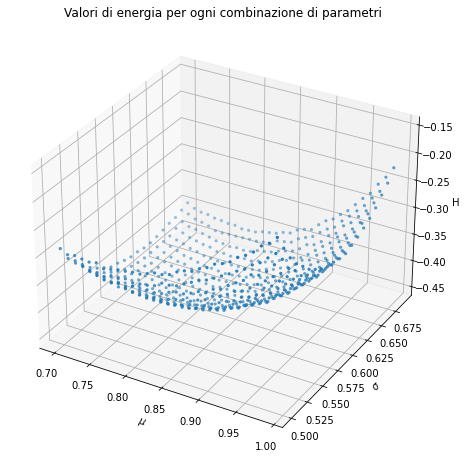

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

with open("MuSigma.dat") as MuSigma:
	MS=np.loadtxt(MuSigma,usecols=(0,1,2),dtype=float)

a=np.where(MS[:,0]==MS[:,0].min())[0][0]
print("Valore di energia minimo:", MS[a,0])
print("μ:", MS[a,1])
print("σ:", MS[a,2])

fig=plt.figure(figsize=(10,6))
ax=Axes3D(fig)
ax.scatter(MS[:,1],MS[:,2],MS[:,0],marker='.')

ax.set_xlabel(r'$\mu$')
ax.set_ylabel(r'$\sigma$')
ax.set_zlabel('H')

ax.set_title('Valori di energia per ogni combinazione di parametri')


plt.show()

Scelti i parametri che maggiormente minimizzano il valore di aspettazione dell'energia, il modulo quadro della funzione d'onda risultante è la densità di probabilità dello stato fondamentale e posso misurare $\langle H\rangle_0$. I valori di aspettazione di energia del ground state con i loro errori al varariare del numero di blocchi è riportato di seguito:

valore finale di Energia:  -0.442463
e sua incertezza:  0.000814244


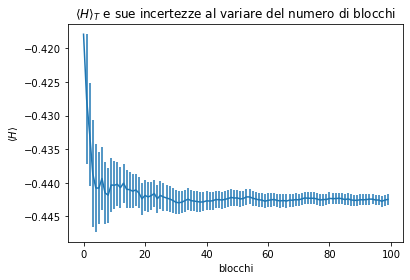

In [39]:
import numpy as np
import matplotlib.pyplot as plt


with open("Hamiltonian.dat") as Ham:
	H=np.loadtxt(Ham,usecols=(0,1),dtype=float)
x=np.arange(0,H[:,0].size)

print("valore finale di Energia: ",H[H[:,0].size-1,0])
print("e sua incertezza: ",H[H[:,0].size-1,1])

plt.errorbar(x,H[:,0],yerr=H[:,1])
plt.xlabel('blocchi')
plt.ylabel(r'$\langle H \rangle$')
plt.title(r'${\langle H \rangle}_T$ e sue incertezze al variare del numero di blocchi')
plt.show()

Per completare l'esercizio ho fatto un istogramma dei punti campionati con il Metropolis per $|\Psi_0(x)|^2$, dove con il pedice $0$ intendo la funzione d'onda con i parametri già minimizzati, quindi quella dello stato fondamentale.

Ho equilibrato il sistema con $10^5$ passi e poi campionato $10^6$ posizioni. Ho calcolato l'istogramma utilizzando python e ho confrontato i miei risultati con la $|\Psi_0^{exp}(x)|^2$ ottenuta con soluzione numerica trasformando l'equazione di Schrodinger in un equazione matriciale. Riporto qui sotto i risultati

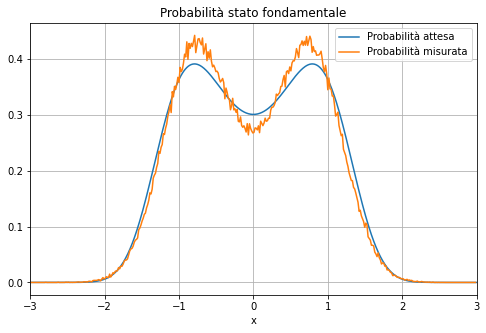

In [50]:
import numpy as np
import matplotlib.pyplot as plt


def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

File=open("Psi.dat")
PsiMes=np.array(File.readlines(),dtype=float)
XPsiMes=np.arange(0,PsiMes.size)


hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2
CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

#print("Ground state energy: ", E[0])
#print("1st excited state energy: ", E[1])
#print("2nd excited state energy: ", E[2])


isto_y,isto_x=np.histogram(PsiMes,bins=np.linspace(-3,3,num=400),density=True)
isto_x=np.delete(isto_x,399)

# Plot a few things
plt.figure(figsize=(8,5))
scale = 0.3
# plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x,(psi[0])**2,label='Probabilità attesa')
# plt.plot(x,(psi[1])**2)
# plt.plot(x,(psi[2])**2)
plt.plot(isto_x,isto_y,label='Probabilità misurata')
plt.title("Probabilità stato fondamentale")
plt.xlabel("x")
plt.legend()
plt.grid(True)
plt.xlim((-3,3))
# plt.ylim((-0.6,0.6))
plt.show()




